In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#train.loc[train['Sex']=='male', 'Sex'] = 1 
train['Age'] = train['Age'].fillna(train['Age'].median())
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train['Age'] = train['Age'] / 10

/Users/pisit/Documents/projects/my-heart-will-go-on/venv/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [7]:
#x_df = pd.DataFrame()
#x_df['Pclass'] = train['Pclass']
#x_df['Age'] = train['Age']
#x_df['Fare'] = train['Fare']
#x_df.tail()
x_df = train[["Pclass","Sex","Age","Embarked"]]
y_df = train['Survived']
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Embarked    891 non-null int64
dtypes: float64(1), int64(3)
memory usage: 27.9 KB


# Linear Regression Using Gradient Descent

In [13]:
def loss_function(x, y, theta):
    return np.sum(np.square((y - np.array([theta]).dot(x.T)))) / 2

In [14]:
def step_gradient(theta, x, y, r):
    s = np.array([0]*len(theta), dtype=float)
    for i in range(len(x)):
        a = r * (y[i] - np.sum(theta*x[i])) * x[i]
        #print(a)
        s += a
        #s += r * (y[i] - np.sum(theta*x[i])) * x[i]
    return theta + r*s

In [15]:
def linear_regression(x, y, epoch=500, learning_rate=0.01):
    x = np.concatenate((np.array([1]*len(x))[:, np.newaxis], x), axis=1)
    theta = np.array([0]*len(x[0]))
    losses = []
    for i in tqdm(range(epoch)):
        theta = step_gradient(theta, x, y, learning_rate)
        losses.append(loss_function(x, y, theta))
        print(losses[-1])
    plt.plot(np.arange(1, len(losses)+1), np.array(losses))
    plt.show()
    print('Loss:', losses[-1])
    return theta


 10%|█         | 10/100 [00:00<00:01, 47.31it/s]

120.25030356860849
119.92225832186753
119.88948447408521
119.85848573346135
119.82754349902193
119.79664756476708
119.76579772810047
119.73499384553463
119.70423577446381
119.673523372821
119.64285649907382
119.61223501222247


 21%|██        | 21/100 [00:00<00:01, 48.26it/s]


119.5816587717976
119.55112763785831
119.52064147099014
119.49020013230279
119.45980348342846
119.42945138651947
119.39914370424651
119.36888029979642
119.33866103687032
119.30848577968155
119.27835439295373



 33%|███▎      | 33/100 [00:00<00:01, 50.40it/s]

119.24826674191874
119.21822269231473
119.1882221103842
119.1582648628721
119.12835081702369
119.0984798405828
119.06865180178974
119.03886656937951
119.0091240125798
118.97942400110907
118.94976640517467
118.92015109547097
118.8905779431774



 45%|████▌     | 45/100 [00:00<00:01, 51.74it/s]

118.86104681995666
118.83155759795274
118.80211014978913
118.77270434856695
118.74334006786306
118.71401718172825
118.68473556468538
118.6554950917276
118.62629563831639
118.59713708037992
118.56801929431111
118.53894215696592
118.50990554566144



 51%|█████     | 51/100 [00:00<00:00, 52.20it/s]

118.4809093381742
118.45195341273833
118.42303764804392
118.39416192323498
118.36532611790793
118.33653011210976
118.30777378633623



 62%|██████▏   | 62/100 [00:01<00:00, 46.60it/s]

118.27905702153024
118.25037969907994
118.22174170081722
118.19314290901578
118.16458320638952
118.13606247609081
118.1075806017088



 71%|███████   | 71/100 [00:01<00:00, 43.71it/s]

118.07913746726773
118.05073295722521
118.02236695647059
117.99403935032325
117.96575002453093
117.93749886526807
117.90928575913418
117.88111059315221
117.85297325476682
117.82487363184282



 82%|████████▏ | 82/100 [00:01<00:00, 44.30it/s]

117.79681161266353
117.76878708592915
117.7407999407551
117.71285006667053
117.68493735361656
117.65706169194483
117.62922297241579
117.60142108619719
117.57365592486246
117.54592738038919
117.51823534515745



 93%|█████████▎| 93/100 [00:02<00:00, 45.07it/s]

117.49057971194839
117.46296037394256
117.43537722471844
117.4078301582508
117.38031906890927
117.35284385145678
117.32540440104798
117.29800061322779
117.27063238392985
117.24329960947503
117.21600218656991
117.18874001230535



100%|██████████| 100/100 [00:02<00:00, 44.47it/s]

117.16151298415487
117.13432099997331
117.10716395799525
117.08004175683361


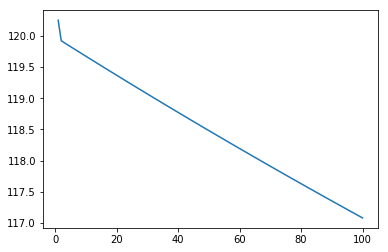

Loss: 117.08004175683361


In [24]:
theta = linear_regression(x_df.values, y_df.values, epoch=100, learning_rate=0.001)

In [ ]:
def sigmoid(theta, x):
    return 1 / (1 + np.e**(-np.sum(theta*x)))

In [ ]:
def logistic_regression(theta, x):
    x = np.concatenate((np.array([1]*len(x))[:, np.newaxis], x), axis=1)
    result = []
    for i in range(len(x)):
        result.append(sigmoid(theta, x[i]))
    return result

In [ ]:
# Calculate Accuracy
result = logistic_regression(theta, x_df.values)
print(result)

In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [ ]:
x_df = test[["Pclass","Sex","Age","Embarked"]]
x_df.info()

In [ ]:
result = logistic_regression(theta, x_df.values)
for i in range(len(result)):
    result[i] = 1 if result[i] > 0.6 else 0
print(test['PassengerId'][0])
out = pd.DataFrame()
out['PassengerId'] = test['PassengerId']
out['Survived'] = np.array(result)
out.to_csv('out.csv', index=False)
#with open('out.csv', 'w') as f:
#    f.write(out.to_csv(index=False))

In [1]:
out

NameError: name 'out' is not defined